# IMPORT ENV


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
from __future__ import print_function

# BOOT

## K-NEAREST NEIGHBORS

Example with data of Iris flower dataset: with have 4 para: length, wirth of sepal and petal

In [ ]:
# get data from dataset
np.random.seed(7)
iris = datasets.load_iris()
print(iris)
iris_X = iris.data
iris_Y = iris.target
print('Labels: ', np.unique(iris_Y))
X_train, X_test, y_train, y_test = train_test_split(iris_X,iris_Y, test_size= 130)
print('Train size: ', X_train.shape[0])
print('Test size: ', X_test.shape[0])



1.   1NN
p = 2 mean l2 norm
It's easy overfitting because the neighbors is only 1.



In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 1NN: %.2f %% " %(100*accuracy_score(y_test, y_pred)))


Accuracy of 1NN: 92.31 % 



2.   7NN



In [ ]:
for i in range(10):
  model = neighbors.KNeighborsClassifier(n_neighbors = i+1, p = 2)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"Accuracy of {i+1}NN: %.2f %% " %(100*accuracy_score(y_test, y_pred)))


Accuracy of 1NN: 92.31 % 
Accuracy of 2NN: 91.54 % 
Accuracy of 3NN: 93.85 % 
Accuracy of 4NN: 94.62 % 
Accuracy of 5NN: 92.31 % 
Accuracy of 6NN: 95.38 % 
Accuracy of 7NN: 93.85 % 
Accuracy of 8NN: 91.54 % 
Accuracy of 9NN: 93.85 % 
Accuracy of 10NN: 88.46 % 


3.   Weight

In [ ]:
# distance weight
model = neighbors.KNeighborsClassifier(n_neighbors = 7, p =2, weights = 'distance' )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: %.2f %% " %(100*accuracy_score(y_test, y_pred)))

Accuracy of 10NN: 94.62 % 


In [ ]:
# self define weight
def my_weight(distances):
  sigma2 = .4
  return np.exp(-distances**2/sigma2)
model = neighbors.KNeighborsClassifier(n_neighbors = 7, p =2, weights = my_weight)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: %.2f %% " %(100*accuracy_score(y_test, y_pred)))

Accuracy: 95.38 % 


## K-MEAN CLUSTERING



1.   Self define



In [ ]:
means = [[2,2], [8,3], [3,6]]
cov = [[1,0], [0,1]]
N =500
x0 = np.random.multivariate_normal(means[0], cov, N)
x1 = np.random.multivariate_normal(means[1], cov, N)
x2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((x0,x1,x2), axis = 0)

k = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T


print(X)
print(X.shape)



[[2.33082589 2.58297817]
 [1.56503095 0.68001636]
 [2.07075942 0.82367557]
 ...
 [3.7143335  6.04587622]
 [2.49860391 7.00288912]
 [3.43037955 6.3743417 ]]
(1500, 2)


In [ ]:
# init the first centroids of this algorithm
def kmeans_init_centroids(X,k):
  return X[np.random.choice(X.shape[0], k, replace = False)]


# find the new label after stablelizing the centroids
def kmeans_asign_labels(X, centroids):
  D = cdist(X, centroids)
  return np.argmin(D, axis = 1)

# check the stop condition
def has_converged(centroids, new_centroids):
  return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

# update the new centroids when know label of all points in cluster
def kmeans_update_centroids(X, labels, k):
  centroids = np.zeros((k, X.shape[1]))
  for i in range(k):
    Xk = X[labels == i, :]
    centroids[i, :] = np.mean(Xk, axis = 0)
  return centroids

# k-means
def kmeans(X, K):
  centroids = [kmeans_init_centroids(X, K)]
  labels = []
  it = 0
  while True:
    labels.append(kmeans_asign_labels(X, centroids[-1]))
    new_centroids = kmeans_update_centroids(X, labels[-1], K)
    if has_converged(centroids[-1], new_centroids):
      break
    centroids.append(new_centroids)
    it = it+1
  return (centroids, labels, it)

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

[[8.06388181 2.97898687]
 [2.93092067 6.0357602 ]
 [1.99498824 2.02359726]]


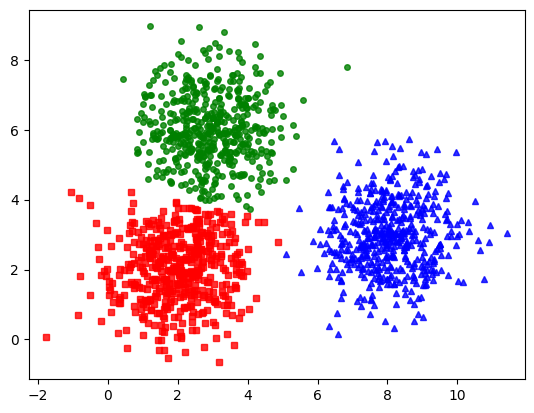

In [ ]:
centroids, labels, it = kmeans(X, k)
print(centroids[-1])
kmeans_display(X, labels[-1])



2.   SKlearn libary



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[8.06388181 2.97898687]
 [2.93092067 6.0357602 ]
 [1.99498824 2.02359726]]


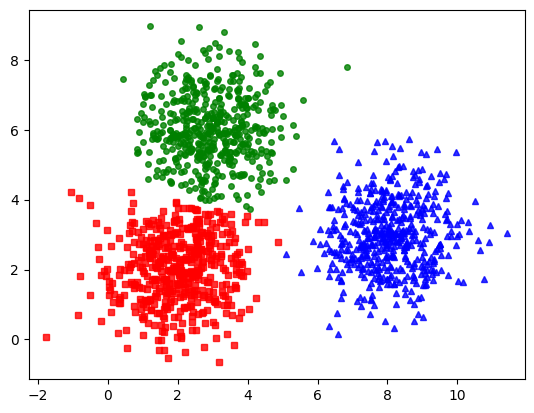

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, random_state = 0).fit(X)
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label)

# NAIVE BAYES

In [ ]:
from __future__ import print_function
from sklearn.naive_bayes import MultinomialNB

import numpy as np
d1 = [2,1,1,0,0,0,0,0,0]
d2 = [1,1,0,1,1,0,0,0,0]
d3 = [0,1,0,0,1,1,0,0,0]
d4 = [0,1,0,0,0,0,1,1,1]

train_data = np.array([d1,d2,d3,d4])
label = np.array(['B','B','B','N'])

d5 = np.array([[2,0,0,1,0,0,0,1,0]])
d6 = np.array([[0,1,0,0,0,0,0,1,1]])

model = MultinomialNB()
model.fit(train_data, label)

print("Predict class of d5: ", str(model.predict(d5)))
print("Probability class of d6: ", model.predict_proba(d6))

Predict class of d5:  ['B']
Probability class of d6:  [[0.29175335 0.70824665]]


# NEURAL NETWORKS


## PERCEPTRON LEARNING ALGORITHM


In [ ]:
import numpy as np
def predict(w, X):
  return np.sign(X.dot(w))

def perceptron(X, y, w_init):
  w = w_init
  while True:
    pred = predict(w, X)
    mis_cls = np.where(np.equal(pred, y) == False)[0]
    num_mis = mis_cls.shape[0]
    if num_mis == 0:
      return w
    random_id = np.random.choice(mis_cls, 1)[0]
    w = w + y[random_id]*X[random_id]


means = [[-1,0], [1,0]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov,N)
X1 = np.random.multivariate_normal(means[1], cov,N)
X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(N), -1*np.ones(N)))
print(y)
Xbar = np.concatenate((np.ones((2*N,1)), X), axis = 1)
print(Xbar)
w_init = np.random.randn(Xbar.shape[1])
w = perceptron(Xbar, y, w_init)
print(w)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
[[ 1.         -1.12547688 -0.6780227 ]
 [ 1.         -1.22790397 -0.59642001]
 [ 1.         -0.25058417  0.75735838]
 [ 1.         -0.57435892 -0.28487329]
 [ 1.         -1.20080299 -0.47430474]
 [ 1.         -0.76856515 -0.04627449]
 [ 1.         -2.10070158 -0.92983008]
 [ 1.         -0.10862775  0.56104592]
 [ 1.         -0.23664479  0.51315243]
 [ 1.         -1.54650325 -0.56934705]
 [ 1.          0.68010691 -0.35677005]
 [ 1.          1.08725864 -0.13611921]
 [ 1.          0.92851489 -0.40281693]
 [ 1.          0.59316162  0.05293183]
 [ 1.          0.97770276 -0.19777094]
 [ 1.          0.30791117 -0.71119807]
 [ 1.          1.18577998  0.0607803 ]
 [ 1.          0.52200429  0.0795978 ]
 [ 1.          0.75447496 -0.83014418]
 [ 1.          1.37286385  0.50850207]]
[ 0.16991265 -2.00621224  0.37498708]


## LOGISTIC REGRESSION


write by hand

In [ ]:
import numpy as np

def sigmoid(s):
  return 1/(1+np.exp(-s))

def prob(w, X):
  return sigmoid(X.dot(w))

def loss(w, X, y, lam):
  z = prob(w, X)
  return -np.mean(y*np.log(z) + (1-y)*np.log(1-z)) + 0.5*lam/X.shape[0]*np.sum(w*w)

def logistic_regression(w_init, X, y, lam = 0.001, lr = 0.1, nepoches = 2000):
  N, d = X.shape[0], X.shape[1]
  w = w_old =w_init
  loss_hist = [loss(w_init,X,y,lam)]
  ep = 0
  while ep < nepoches:
    ep +=1
    mix_ids = np.random.permutation(N)
    for i in mix_ids:
      xi = X[i]
      yi = y[i]
      zi = sigmoid(xi.dot(w))
      w = w - lr*((zi-yi)*xi + lam*w)

    loss_hist.append(loss(w,X,y,lam))
    if np.linalg.norm(w - w_old)/d < 1e-6:
      break
    w_old = w
  return w, loss_hist


X = np.array([[0.5,0.75,1,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3,3.25,3.5,4,4.25,4.5,4.75,5.0,5.5]]).T
y = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

N = 20
Xbar = np.concatenate((X, np.ones((N,1))), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
lam = 0.0001
w, loss_hist = logistic_regression(w_init, Xbar, y, lam, lr = 0.05, nepoches=500)
print(w)
print(loss(w,Xbar, y, lam))


[ 1.48322191 -4.09856706]
0.40195029478699024


with sklearn

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

mnist = fetch_openml('mnist_784', version =1)
X,y = mnist.data, mnist.target.astype(int)
N, d = X.shape
print(N, d)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


70000 784


In [ ]:
X0 = X[y==0]
X1 = X[y==1]
y0 = np.zeros(X0.shape[0])
y1 = np.ones(X1.shape[0])
X_2 = np.concatenate((X0, X1))
y_2 = np.concatenate((y0, y1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LogisticRegression(C = 1e5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(100*accuracy_score(y_test, y_pred.tolist()))

91.7642857142857


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SOFTMAX REGRESSION

In [17]:
import numpy as np
def softmax(Z):
  e_Z = np.exp(Z)
  A = e_Z/e_Z.sum(axis = 1, keepdims = True)
  return A

def softmax_stable(Z):

  e_z = np.exp(Z - np.max(Z, axis = 1, keepdims =True))
  A = e_z/e_z.sum(axis = 1, keepdims = True)
  return A

In [19]:
def softmax_loss(X,y,W):
  A = softmax_stable(X.dot(W))
  id0=range(X.shape[0])
  return -np.mean(np.log(A[id0,y]))
def softmax_grad(X,y,W):
  A = softmax_stable(X.dot(W))
  id0 = range(X.shape[0])
  A[id0,y] -=1
  return X.T.dot(A)/X.shape[0]

In [23]:
def softmax_fit(X,y,W,lr = 0.01, nepoches = 100, tol = 1e-5, batch_size = 10):
  W_old = W.copy()
  ep = 0
  loss_hist = [softmax_loss(X,y,W)]
  N = X.shape[0]
  nbatches = int(np.ceil(float(N)/batch_size))
  while ep < nepoches:
    ep +=1
    mix_ids = np.random.permutation(N)
    for i in range(nbatches):
      batch_ids = mix_ids[batch_size*i:min(batch_size*(i+1), N)]
      X_batch, y_batch = X[batch_ids], y[batch_ids]
      W -= lr*softmax_grad(X_batch, y_batch, W)
    loss_hist.append(softmax_loss(X,y,W))
    if np.linalg.norm(W - W_old)/W.size < tol:
      break
    W_old = W.copy()
  return W, loss_hist

In [13]:
def pred(W, X):
  return np.argmax(X.dot(W), axis =1)

In [24]:
C, N = 5, 500
means = [[2,2], [8,3], [3,6], [14,2], [12,8]]
cov = [[1,0],[0,1]]
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X4 = np.random.multivariate_normal(means[4], cov, N)
X = np.concatenate((X0,X1,X2,X3,X4), axis = 0)
Xbar = np.concatenate((X, np.ones((X.shape[0],1))), axis = 1)
y = np.asarray([0]*N + [1]*N + [2]*N + [3]*N+[4]*N)
W_init = np.random.randn(Xbar.shape[1], C)
W, loss_hist = softmax_fit(Xbar, y, W_init, batch_size = 10, nepoches = 100, lr = 0.05)

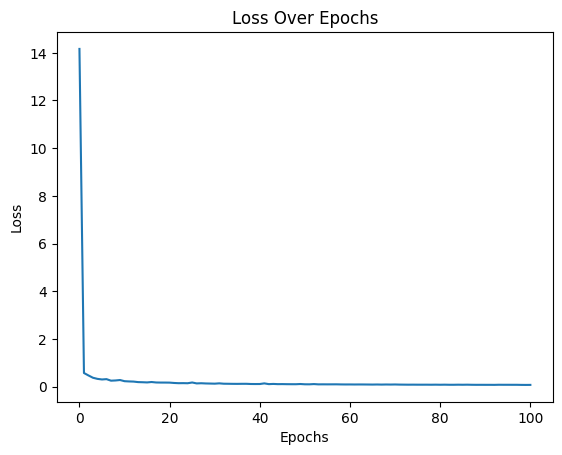

In [28]:
import matplotlib.pyplot as plt

plt.plot(loss_hist)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.show()

In [52]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

mnist = fetch_openml('mnist_784', version =1)
X,y = mnist.data, mnist.target.astype(int)
N, d = X.shape
print(N, d)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


70000 784


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LogisticRegression(C = 1e-5, solver = 'lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred.tolist()))

0.9192857142857143


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
